# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [5]:
#build base URL and query URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f'{url}appid={weather_api_key}&q='
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=21595e39f7c13a3649db142ce6774aee&q='

In [6]:
city_df = pd.DataFrame(cities)
city_df.rename(columns ={city_df.columns[0]:"City"},inplace = True)
city_df

City
0          jamestown
1    les ponts-de-ce
2         butaritari
3        antofagasta
4             albany
..               ...
603      mitsamiouli
604            basco
605        ulladulla
606            goure
607            reyes

[608 rows x 1 columns]

In [7]:
#create columns to add to the city dataframe to hold it all
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind"] = ""
city_df["Country"] = ""
city_df["Date"] = ""
city_df.head()

City Lat Lng Temp Humidity Cloudiness Wind Country Date
0        jamestown                                                   
1  les ponts-de-ce                                                   
2       butaritari                                                   
3      antofagasta                                                   
4           albany

In [8]:
#add the api key to the parameter
params = {"q": weather_api_key}

In [9]:
weather_response = requests.get(query_url + city).json()
weather_response

{'coord': {'lon': -67.3833, 'lat': -14.3167},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 302.24,
  'feels_like': 303.05,
  'temp_min': 302.24,
  'temp_max': 302.24,
  'pressure': 1017,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 2.06, 'deg': 120},
 'clouds': {'all': 18},
 'dt': 1628113526,
 'sys': {'type': 1,
  'id': 8630,
  'country': 'BO',
  'sunrise': 1628074202,
  'sunset': 1628115667},
 'timezone': -14400,
 'id': 3906478,
 'name': 'Reyes',
 'cod': 200}

In [10]:
# loop through the cities to get all the data we want

for index, row in city_df.iterrows():
    city = row['City']
    params ["q"] = city
    
    weather_response = requests.get(query_url + city).json()
    print(f'Record {index}:{city}')
        
    try:
        city_df.loc[index,'Lat'] = weather_response['coord']['lat']
        city_df.loc[index,'Lng'] = weather_response['coord']['lon']
        city_df.loc[index,'Temp'] = weather_response['main']['temp_max']
        city_df.loc[index,'Humidity'] = weather_response['main']['humidity']
        city_df.loc[index,'Cloudiness']= weather_response['clouds']['all']
        city_df.loc[index,'Wind']= weather_response['wind']['speed']
        city_df.loc[index,'Country']= weather_response['sys']['country']
        city_df.loc[index,'Date']= weather_response['dt']
        
    except(KeyError, SyntaxError):
        print("City not found. Skipping")
        

Record 0:jamestown
Record 1:les ponts-de-ce
Record 2:butaritari
Record 3:antofagasta
Record 4:albany
Record 5:touros
Record 6:jacareacanga
Record 7:luderitz
Record 8:barentsburg
City not found. Skipping
Record 9:lebu
Record 10:thames
Record 11:clyde river
Record 12:cape town
Record 13:praya
Record 14:lorengau
Record 15:leningradskiy
Record 16:nizhneyansk
City not found. Skipping
Record 17:upernavik
Record 18:amderma
City not found. Skipping
Record 19:carnarvon
Record 20:barrow
Record 21:tekeli
Record 22:ponferrada
Record 23:maple creek
Record 24:bluff
Record 25:bambous virieux
Record 26:mount gambier
Record 27:arraial do cabo
Record 28:marsa matruh
Record 29:okhotsk
Record 30:wyszkow
Record 31:bajil
Record 32:aurad
Record 33:mys shmidta
City not found. Skipping
Record 34:soyo
Record 35:codrington
Record 36:khorixas
Record 37:muisne
Record 38:koumac
Record 39:avera
Record 40:bredasdorp
Record 41:arlit
Record 42:egvekinot
Record 43:opuwo
Record 44:maldonado
Record 45:rikitea
Record 46:be

Record 370:walvis bay
Record 371:marcona
City not found. Skipping
Record 372:maxixe
Record 373:buraydah
Record 374:kaoma
Record 375:vila
Record 376:umzimvubu
City not found. Skipping
Record 377:mahadday weyne
City not found. Skipping
Record 378:morogoro
Record 379:dzemul
Record 380:ati
Record 381:faanui
Record 382:blackwater
Record 383:ondjiva
Record 384:yar-sale
Record 385:teya
Record 386:husavik
Record 387:ust-ordynskiy
Record 388:pafos
Record 389:ndjole
Record 390:jiaozuo
Record 391:rawson
Record 392:toliary
City not found. Skipping
Record 393:abu dhabi
Record 394:liku
Record 395:otane
Record 396:isangel
Record 397:brigantine
Record 398:pacific grove
Record 399:saiha
Record 400:mehamn
Record 401:sajanan
Record 402:cairns
Record 403:saldanha
Record 404:boguchany
Record 405:maun
Record 406:molochnoye
Record 407:kawalu
Record 408:svetlyy
Record 409:chilca
Record 410:kayasula
Record 411:takoradi
Record 412:batagay-alyta
Record 413:kaunas
Record 414:tiksi
Record 415:muros
Record 416:tsih

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_df.to_csv("Resources/output.csv", index=False)

In [12]:
#create a dataframe to hold it all
city_df.head()

City      Lat       Lng    Temp Humidity Cloudiness  Wind  \
0        jamestown   42.097  -79.2353  298.92       46          1  3.09   
1  les ponts-de-ce  47.4231   -0.5248   290.4       99         89  2.53   
2       butaritari   3.0707  172.7902  301.14       66         83  3.88   
3      antofagasta   -23.65     -70.4  287.75       64         13  1.66   
4           albany  42.6001  -73.9662  299.51       56        100  1.38   

  Country        Date  
0      US  1628113268  
1      FR  1628113527  
2      KI  1628113528  
3      CL  1628113492  
4      US  1628113529

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_df['Humidity']= pd.to_numeric(city_df["Humidity"])
humidity_sort = city_df.sort_values(by='Humidity', ascending = False)
humidity_sort.head()

City      Lat       Lng    Temp  Humidity Cloudiness  Wind  \
469       sri aman   1.2376  111.4621  296.18     100.0         99  0.51   
454      ketchikan  55.3422 -131.6461  289.41     100.0         90  5.66   
26   mount gambier -37.8333  140.7667   281.1     100.0         40  3.09   
11     clyde river  70.4692  -68.5914  276.28     100.0         90  4.63   
286         bereda  43.2686   -7.5406  289.21      99.0         11  0.89   

    Country        Date  
469      MY  1628113807  
454      US  1628113679  
26       AU  1628113546  
11       CA  1628113535  
286      ES  1628113711

In [14]:
city_df['Temp']= pd.to_numeric(city_df['Temp'])
city_df['Lat']= pd.to_numeric(city_df['Lat'])
city_df['Cloudiness']= pd.to_numeric(city_df['Cloudiness'])
city_df['Wind']= pd.to_numeric(city_df['Wind'])

In [15]:
#  Get the indices of cities that have humidity over 100%.
# no indices have humidity over 100% thankfully

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

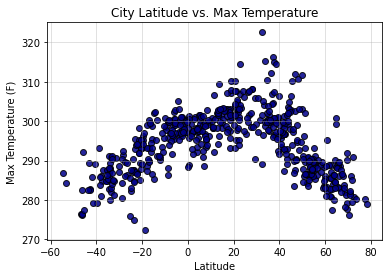

In [17]:
#Create a scatter plot for lat v. temp
plt.scatter(city_df["Lat"],city_df["Temp"],facecolors = "darkblue", edgecolors = "black", alpha = .85)

#set labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#set title
plt.title("City Latitude vs. Max Temperature")

#set a grid so it looks nicer
plt.grid(linestyle='-',linewidth = .75, alpha = .5)

## Latitude vs. Humidity Plot

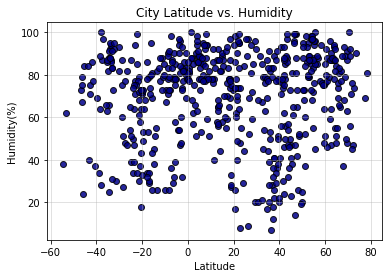

In [18]:
#Create a scatter plot for lat v. temp
plt.scatter(city_df["Lat"],city_df["Humidity"],facecolors = "darkblue", edgecolors = "black", alpha = .85)

#set labels
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

#set title
plt.title("City Latitude vs. Humidity")

#set a grid so it looks nicer
plt.grid(linestyle='-',linewidth = .75, alpha = .5)

## Latitude vs. Cloudiness Plot

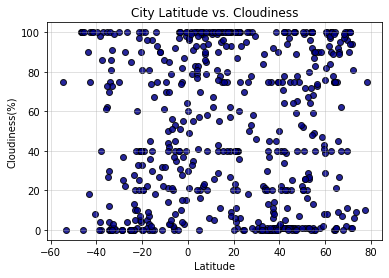

In [19]:
#Create a scatter plot for lat v. temp
plt.scatter(city_df["Lat"],city_df["Cloudiness"],facecolors = "darkblue", edgecolors = "black", alpha = .85)

#set labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#set title
plt.title("City Latitude vs. Cloudiness")

#set a grid so it looks nicer
plt.grid(linestyle='-',linewidth = .75, alpha = .5)

## Latitude vs. Wind Speed Plot

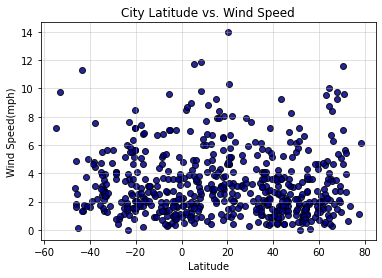

In [20]:
#Create a scatter plot for lat v. temp
plt.scatter(city_df["Lat"],city_df["Wind"],facecolors = "darkblue", edgecolors = "black", alpha = .85)

#set labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

#set title
plt.title("City Latitude vs. Wind Speed")

#set a grid so it looks nicer
plt.grid(linestyle='-',linewidth = .75, alpha = .5)

## Linear Regression

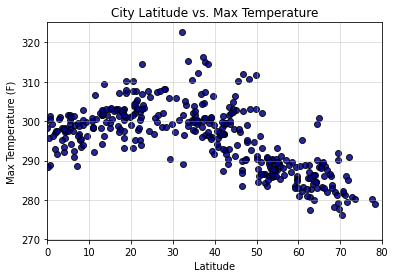

In [21]:
#set Northern Hemisphere by filtering to Lat at -
plt.xlim(0, 80)

#Create a scatter plot for lat v. temp
plt.scatter(city_df["Lat"],city_df["Temp"],facecolors = "darkblue", edgecolors = "black", alpha = .85)

#set labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#set title
plt.title("City Latitude vs. Max Temperature")

#set a grid so it looks nicer
plt.grid(linestyle='-',linewidth = .75, alpha = .5)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
from scipy import stats
from scipy.stats import linregress

In [24]:
n_hemisphere = city_df.loc[city_df["Lat"] >= 0]
n_hemisphere_df = n_hemisphere["Lat"]
temp = n_hemisphere["Temp"]

In [38]:
(temp_slope, temp_int, temp_r, temp_p, tem_std_err) = linregress(n_hemisphere_df, temp)

In [39]:
regression_fit = temp_slope*n_hemisphere_df + temp_int

Text(0, 0.5, 'Maximum Temp')

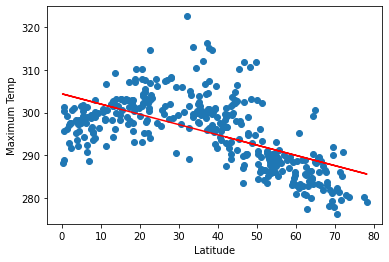

In [40]:
plt.scatter(n_hemisphere_df, temp)
plt.plot(n_hemisphere_df, regression_fit, "r-")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp')
plt.title("Northern Hemisphere - Max Temp v. lat Lin Regression")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
s_hemisphere = city_df.loc[city_df["Lat"]<=0]
s_hemisphere_df = s_hemisphere["Lat"]
s_temp = s_hemisphere["Temp"]

In [49]:
(s_slope, s_int, s_r, s_p, s_std_err) = linregress(s_hemisphere_df, s_temp)
s_regression_fit = s_slope * s_hemisphere_df + s_int

Text(0.5, 1.0, 'Souther Hemisphere - Max Temp v. lat Lin Regression')

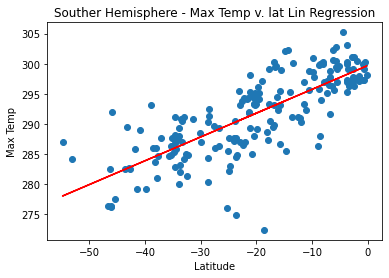

In [50]:
plt.scatter(s_hemisphere_df, s_temp)
plt.plot(s_hemisphere_df, s_regression_fit, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp v. lat Lin Regression")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


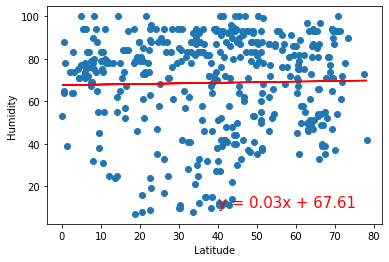

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


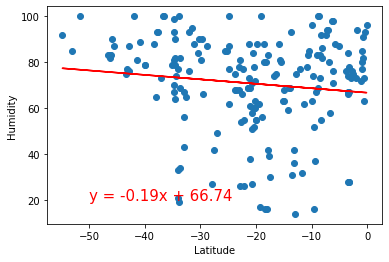

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


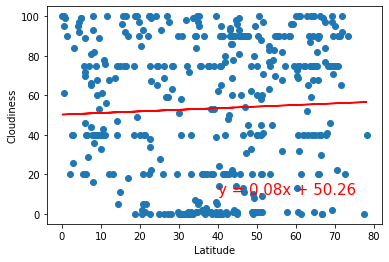

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


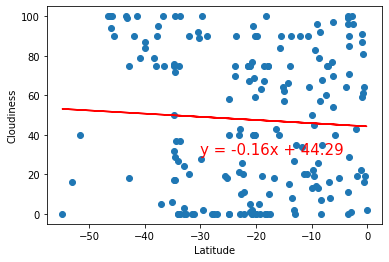

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


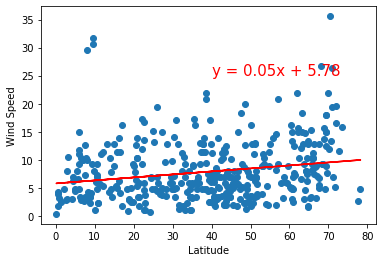

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


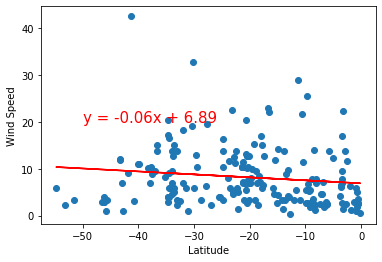